# Polynomial Linear Regression

Polynomial Linear Regression Genel Formülü:

y = a + b1*x + b2*x^2 + b3*x^3 + b4*x^4 + ....... + bN*x^N


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Veri setimizi pandas yardımıyla alıp dataframe nesnemiz olan df'in içine aktarıyoruz..
df = pd.read_csv("polynomial.csv",sep = ";")






In [2]:
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


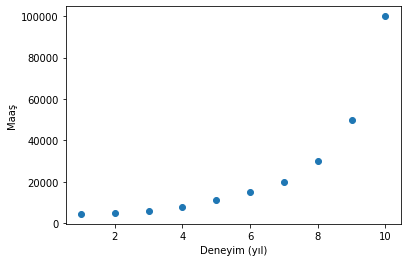

In [3]:

# Veri setimize bir bakalım
plt.scatter(df['deneyim'],df['maas'])
plt.xlabel('Deneyim (yıl)');
plt.ylabel('Maaş')
plt.savefig('1.png', dpi=300)
plt.show()

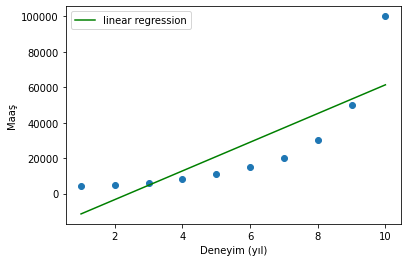

In [4]:
# Görüldüğü gibi doğrusal bir yapıda dağılmıyor veriler
# Eğer biz bu veri setine linear regression uygularsak hiç uygun olmayan bir tahmin çizigisi görürüz:

reg = LinearRegression()
reg.fit(df[['deneyim']],df['maas'])

plt.xlabel('Deneyim (yıl)')
plt.ylabel('Maaş')

plt.scatter(df['deneyim'],df['maas'])   

xekseni = df['deneyim']
yekseni = reg.predict(df[['deneyim']])
plt.plot(xekseni, yekseni,color= "green", label = "linear regression")
plt.legend()
plt.show()

#### Tahmin için çok kötü bir doğru, demek ki neymiş: Bu veri seti için lineer regresyon uygulamak doğru değilmiş. Unutmayın veri setinize göre model seçeceksiniz arkadaşlar ! Öncelikle veri setinize çok iyi hakim olmalı ve bilmelisiniz !!!



### Bu veri seti için regression çeşitlerinden polynomial regression uygulanması gerektiğine kara verdik. Şimdi nasıl uyguladığımıza bakalım:


x değerimizi polinom yukardaki fonksiyonuna uyacak şekilde uyarlanmasını sağlıyoruz


Yani => 1, x, x^2 (N=2) şeklinde

In [56]:
# bir adet polynomial regression nesnesi oluşturması için PolynomialFeatures fonksiyonunu çağırıyoruz
# Bu fonksiyonu çağırırken polinomun derecesini (N) belirtiyoruz:
polynomial_regression = PolynomialFeatures(degree = 4)

x_polynomial = polynomial_regression.fit_transform(df[['deneyim']])



In [57]:
x_polynomial

array([[1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03],
       [1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04],
       [1.00000e+00, 1.20000e+01, 1.44000e+02, 1.72800e+03, 2.07360e+04],
       [1.00000e+00, 1.40000e+01, 1.96000e+02, 2.74400e+03, 3.84160e+04],
       [1.00000e+00, 1.60000e+01, 2.56000e+02, 4.09600e+03, 6.55360e+04],
       [1.00000e+00, 1.80000e+01, 3.24000e+02, 5.83200e+03, 1.04976e+05],
       [1.00000e+00, 2.00000e+01, 4.00000e+02, 8.00000e+03, 1.60000e+05]])

In [58]:
# regression model nesnemizi olan reg nesnemizi oluşturup bunun fit metodunu çağırarak x_polynomial ve y eksenlerini fit ediyor
# yani regresyon modelimizi mevcut gerçek verilerle eğitiyoruz:
reg = LinearRegression()
reg.fit(x_polynomial,df['maas'])



LinearRegression()

### Artık modelimiz hazır ve eğitilmiş, şimdi eldeki verilere göre modelimiz nasıl bir sonuç grafiği oluşturuyor onu görelim:

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


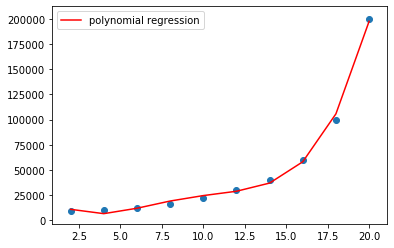

In [59]:
y_head = reg.predict(x_polynomial)
plt.plot(df['deneyim'],y_head,color= "red",label = "polynomial regression")
#plt.plot(xekseni, yekseni,color= "green", label = "linear regression")
plt.legend()

#veri setimizi de noktlaı olarak scatter edelim de görelim bakalım uymuş mu polynomial regression:
plt.scatter(df['deneyim'],df['maas'])   

plt.show()

Gördüğünüz gibi kesinlikle uymuş diyebiliriz, polynomial regression doğru bir seçim.
Şimdi bir de N=3 veya 4 yapıp görelim polinom derecesini artırdığımızda daha güzel fit edecek mi acaba?

In [60]:

x_polynomial1 = polynomial_regression.fit_transform([[4.5]])
reg.predict(x_polynomial1)

array([7167.71721105])

0.9162082221443943


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


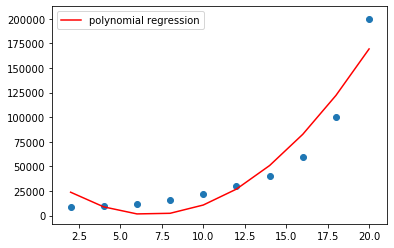

0.9812097727913366


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


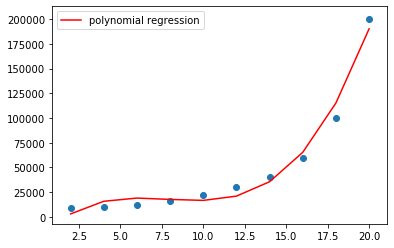

0.9973922891706613


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


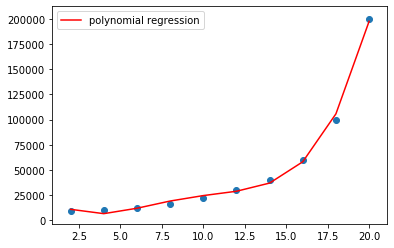

0.9997969027099755


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


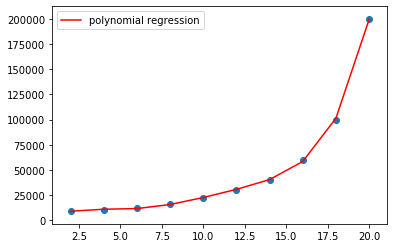

0.9999494749253776


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


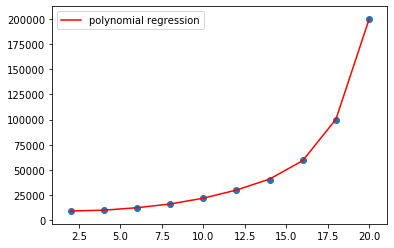

In [61]:
for n in range(5):
    poli(n+1)

In [42]:
def poli(n):
    # bir adet polynomial regression nesnesi oluşturması için PolynomialFeatures fonksiyonunu çağırıyoruz
    # Bu fonksiyonu çağırırken polinomun derecesini (N) belirtiyoruz:
    polynomial_regression = PolynomialFeatures(degree = n+1)

    x_polynomial = polynomial_regression.fit_transform(df[['deneyim']])
    #    n=4 [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02]
    reg = LinearRegression()
    reg.fit(x_polynomial,df['maas'])
    print(reg.score(x_polynomial,df['maas']))
    pltplot(x_polynomial,reg)

In [43]:
def pltplot(x_polynomial,reg):
    y_head = reg.predict(x_polynomial)
    plt.plot(df['deneyim'],y_head,color= "red",label = "polynomial regression")
    #plt.plot(xekseni, yekseni,color= "green", label = "linear regression")
    plt.legend()

    #veri setimizi de noktlaı olarak scatter edelim de görelim bakalım uymuş mu polynomial regression:
    plt.scatter(df['deneyim'],df['maas'])   

    plt.show()